# Compactamiento de 10 circulos

## Representacion de circulos

RADIOS  =  [[radio1],[radio2],... ] 

centers =  [[x1,y1],[x2,y2],... ] 

Cada individuo sera una lista de 10 centros.

RADIOS no se modifica es el mismo durante todo el programa.


In [11]:


import numpy as np

def radios (numberCircles  = 10):
    # 1/ (n)**0.5
    return 1/np.sqrt(np.arange(1,numberCircles+1))

def generate(numberCircles  = 10):
    # genera 10 centros aleatorios
    return  (np.random.rand(numberCircles,2)-0.5)*8


print (generate())
RADIOS = radios()



[[-1.25451923  1.69268204]
 [-1.17471546 -2.38589272]
 [-2.40495625  2.98859141]
 [-3.0415715   2.67591141]
 [-1.68591633 -2.17698831]
 [-0.66517036 -2.59837093]
 [-1.36606637 -1.89821361]
 [ 3.30916917 -3.69820815]
 [ 2.13927892 -3.60751083]
 [ 3.29140185  1.88099814]]


## Fitness 
Para el fitness tomaremos el radio del circulo tangente mas grande

<img src="https://i.postimg.cc/XYVQwTFD/Ctangente.png" alt="" /> 

Lo calculamos de la siguiente manera:

In [12]:

def getRadius(centers:np.array ):
    # Radio del circulo tangente exterior respecto al centro

    unit = 1/ np.linalg.norm(centers , axis=1)
    unit  = np.multiply(centers ,  np.array([unit , unit ]).T)
    #print(unit)
    radiuses_duplicate = np.array([RADIOS , RADIOS ]).T
    #print(radiuses_duplicate)
    tangent  =  centers + (np.multiply(unit , radiuses_duplicate) )
    #print("tgm", tangent)
    return   np.linalg.norm(tangent, axis=1)



### Visualizando los 10 circulos (un individuo) y sus tangentes
El circulo tangente mas grande se tomara como fitness.


<Figure size 450x450 with 0 Axes>

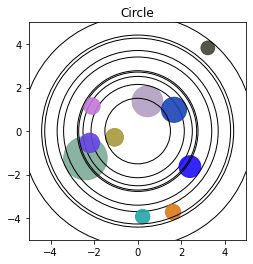

In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random 


figure(figsize=(5, 5), dpi=90)



def plotCircles(centers):
    figure, axes = plt.subplots()
    tangets = getRadius(centers)
    #print(tangets)
    for i in range(len(RADIOS)):
        draw_circle = plt.Circle(tuple(centers[i]), RADIOS[i],alpha = 0.9 , color= [random.random(),random.random(),random.random()])
        draw_circle_t = plt.Circle((0,0), tangets[i] , color= [0,0,0],fill=False )
        axes.add_artist(draw_circle)
        axes.add_artist(draw_circle_t)
    ax = plt.gca()

    limits= 5
    ax.set_xlim([-limits, limits])
    ax.set_ylim([-limits, limits])
    ax.set_aspect(1)
    plt.title('Circle')
    plt.show()

cnt = generate()

plotCircles(cnt.tolist() )


In [14]:
def checkSolapamiento(centers):
    '''
    Compara cada par de circulos para ver si se cruzan 
    '''
    for i in range (len(centers)):
        for j in range (i+1,len(centers)):
            #print("Comparing ci :", centers[i]) 
            #print("Comparing cj :", centers[j])
            if (np.linalg.norm(centers[i] - centers[j]) < RADIOS[i]+ RADIOS[j]):
                return True
    return False


In [15]:
print(checkSolapamiento( np.array([[10,10],[0,0],[0,4]]) ))
print(checkSolapamiento( np.array([[-10,-10],[0,0],[0,4]]) ))
print(checkSolapamiento( np.array([[-0.9,0],[0,0],[0,4]]) ))
print(checkSolapamiento( np.array([[10,10],[0,0],[0,4]]) ))
print(checkSolapamiento( np.array([[10,10],[0,0],[0,4]]) ))




False
False
True
False
False


Se crea un fitness que penaliza fuertemente los solapamientos.

In [16]:


def fitness (individuo ):
    return 100.0 if checkSolapamiento(individuo) else max(getRadius(individuo)) 


def sortBy(a : list , b : list , mayoresPrimero = True):
    '''Funcion ordena la lista a segun el ordenamiento de la lista b
        por ejemplo ordenar indidvidos segun lista de fitness.
    '''
    pares  =  [ (ai , bi) for ai,bi in zip(a,b)]
    ordenados = sorted(pares , key = lambda x : x[1], reverse=mayoresPrimero)
    return  [x[0] for x  in ordenados]


def reproducir(seta:np.array , setb:np.array):
    ''' Reproducion tomando un indice aleatorio e intercambiando circulos apartir de ahi'''
    point = random.randint(1, len(seta) - 2)
    new1 = np.concatenate( (seta[:point], setb[point:]))
    return new1


print(reproducir( np.array([[0,0],[0,0],[0,0],[0,0]]) ,np.array([[1,1],[1,1],[1,1],[1,1]]) ))




[[0 0]
 [0 0]
 [1 1]
 [1 1]]


In [17]:
def cruzamiento (poblacion:list, cantidadDeHijos= 16):
    ''' Cruzando pares i1 con i2 , i2 con i3 ,i3 con i4 ,.... '''
    pop =  sortBy(poblacion , [fitness(ind) for ind  in poblacion]  ,mayoresPrimero=False)  
    pop= pop[:cantidadDeHijos]
    #print ("Pob" , len (poblacion))
    #print ("-------------------")
    for i in range(len(poblacion )-2):
        pop.append( reproducir(poblacion[i] , poblacion[i+1]))
    return pop

def mutar (indiv:list, rndstep = 0.5):
    ''' Mover aleatoriamente segun un vector de tamanio rndstep'''
    punto = random.randint(0, len(indiv) -1)
    mutated = np.concatenate ((indiv[:punto] ,indiv[punto] + (np.random.rand(1,2) -0.5)*rndstep , indiv[punto+1:]) )
    return mutated



def mutarPob(poblacion , ratioDeMutacion = 0.5,step = 0.5):
    poblacionMutada= []
    for invividuo in poblacion:
        # solo un porcentaje% se muta
        if (random.random() < ratioDeMutacion):
            poblacionMutada.append(mutar(invividuo, rndstep = step))
        else:
            poblacionMutada.append(invividuo)
    return poblacionMutada

def seleccionarSiguientes(poblacion ,f , cantidad):
    ''' Seleccionando los "cantidad" mas aptos '''
    ftns = [f(e) for e in poblacion]
    poblacion = sortBy(poblacion ,ftns ,mayoresPrimero=False)
    return poblacion[:cantidad]

## Algoritmo canonico

In [18]:
def Optimizar ( iteraciones):
    tamanio = 40
    poblacion= [ generate() for _ in range(tamanio ) ]
    mutationStep = 0.5
    for it in range (iteraciones):
        
        popblacionEHijos = cruzamiento(poblacion, cantidadDeHijos= tamanio)
        popblacionMutada = mutarPob(popblacionEHijos ,ratioDeMutacion=0.6,step = mutationStep)
        poblacion = seleccionarSiguientes(popblacionMutada,fitness,tamanio)
        if it % 50 == 0 :
            print("Mejor ind iteracion:" , it, "fitness: ", fitness(poblacion[0]))
            plotCircles(poblacion[0])
        if (it > 200): mutationStep = 0.3
        if (it > 750): mutationStep = 0.1



    return poblacion[0]


Mejor ind iteracion: 0 fitness:  4.909158734368332


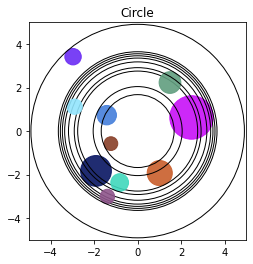

Mejor ind iteracion: 50 fitness:  3.897180913521201


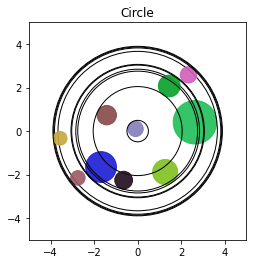

Mejor ind iteracion: 100 fitness:  3.577996584618065


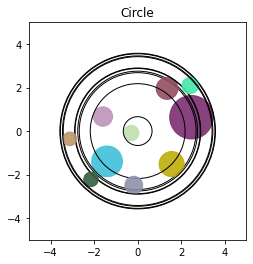

Mejor ind iteracion: 150 fitness:  3.220256590961082


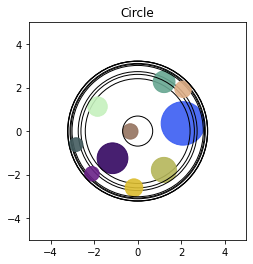

Mejor ind iteracion: 200 fitness:  2.8364576673599693


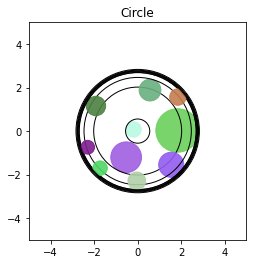

Mejor ind iteracion: 250 fitness:  2.6275668882275305


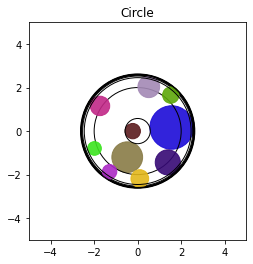

Mejor ind iteracion: 300 fitness:  2.5470908618862587


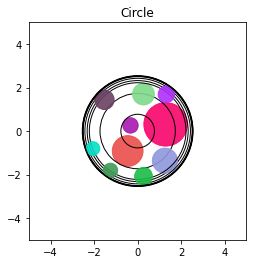

Mejor ind iteracion: 350 fitness:  2.42702128133195


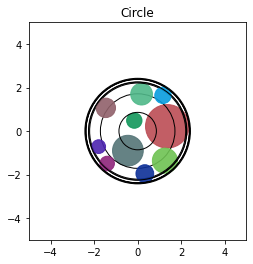

Mejor ind iteracion: 400 fitness:  2.363080374244261


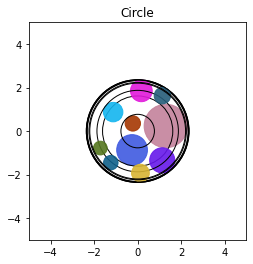

Mejor ind iteracion: 450 fitness:  2.323567209311194


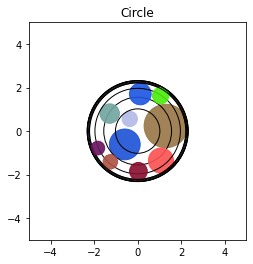

Mejor ind iteracion: 500 fitness:  2.2591817650641763


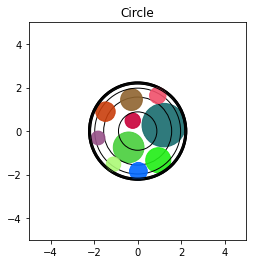

Mejor ind iteracion: 550 fitness:  2.236859110072018


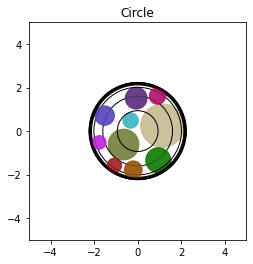

Mejor ind iteracion: 600 fitness:  2.1842430209144195


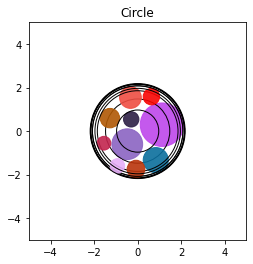

Mejor ind iteracion: 650 fitness:  2.171534819274892


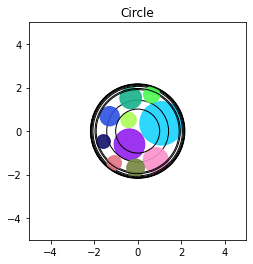

Mejor ind iteracion: 700 fitness:  2.1340857433194427


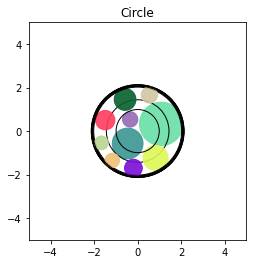

Mejor ind iteracion: 750 fitness:  2.1205373060442305


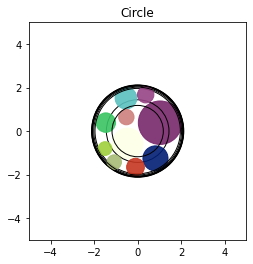

Mejor ind iteracion: 800 fitness:  2.089978087473709


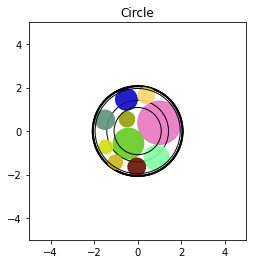

Mejor ind iteracion: 850 fitness:  2.086651679199567


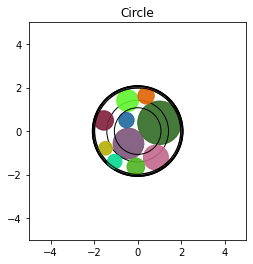

Mejor ind iteracion: 900 fitness:  2.086619976949455


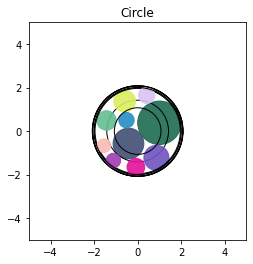

Mejor ind iteracion: 950 fitness:  2.086160272644341


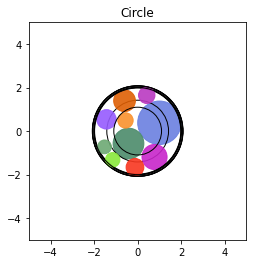

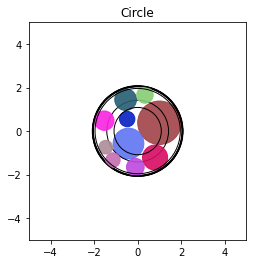

In [19]:
opt = Optimizar(1000)
plotCircles(opt)

In [20]:
print(opt)
fitness(opt)

[[ 1.00099357  0.38168998]
 [-0.42234082 -0.57421298]
 [ 0.80010591 -1.21871578]
 [-0.55436156  1.44881706]
 [-1.53404305  0.4795341 ]
 [-0.10768064 -1.65909397]
 [ 0.33409025  1.65844285]
 [-0.48190501  0.55334565]
 [-1.1385559  -1.33261651]
 [-1.46887208 -0.7404741 ]]


2.086095808661367